## Notebook objectives

Find insights on geolocation segments


## Agenda

[Business Context](#Business-Context)<br> 
&emsp;[Business Questions](#Business-Questions)<br>
&emsp;[Hypothesis](#Hypothesis)<br>

[Imports](#Imports)<br>
&emsp;[Helper Functions and Classes](#Helper-Functions-and-Classes)<br>


[Settings](#Settings)<br>

[Loading Data](#Loading-Data)<br>
&emsp;[df_payments](#df_payments)<br>
&emsp;[df_products](#df_products)<br>
&emsp;[df_order_items](#df_order_items)<br>
&emsp;[df_geolocations](#df_geolocations)<br>
&emsp;[df_customers](#df_customers)<br>


[Analytical Base Table](#Analytical-Base-Table)<br>
&emsp;[ABT Metadata](#ABT-Metadata)<br>
&emsp;[df_payment_abt](#df_payment_abt)<br>
&emsp;[df_orders_abt](#df_orders_abt)<br>
&emsp;[df_geolocation_abt](#df_geolocation_abt)<br>


[Business Answers](#Business-Answers)<br>

[Hypothesis Answers](#Hypothesis-Answers)<br>
&emsp;[Sales](#Sales)<br>
&emsp;[Profit](#Profit)<br>
&emsp;[delivery_time](#delivery_time)<br>
&emsp;[days_to_ship](#days_to_ship)<br>
&emsp;[delayed_days](#delayed_days)<br>
&emsp;[n_products](#n_products)<br>
&emsp;[avg_discount](#avg_discount)<br>
&emsp;[avg_product_price](#avg_product_price)<br>
&emsp;[shipping_cost](#shipping_cost)<br>

[Analysis Results](#Analysis-Results)<br>

## Business Context

E-Mart is a Chinese retailer that discovered the e-commerce as a way to sell to the entire world, rather than just to the population of their home city. The company has been growing without much worries, and now It wants to start using the data collected during its 4 years of e-commerce to keep growing and make more money.


The company has been growing without much worries, and now It wants to start using the data collected during the years to keep growing and make more money.
At first, the board of directors expects:

- A Dashboard with KPIs to track their growth.
<br>

- Robust Data Analysis, as well as recommendation of actions. What's the actionable based on your analysis?
<br>

- **An Analysis on geolocation, a segmentation by sales, profit and more. They want insights to help increasing revenue.**
<br>

- Sales forecast for the next year, in order to enable strategic planning.



### Business Questions


## Hypothesis

Look into sales, profit, discount, number of orders, products sold... within geolocation groups.

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Helper Functions and Classes

In [2]:
def get_snakecase_columns(df):
    """Sets column name to snake_case format
    
    df: pandas.DataFrame
    
    Return: map
    """
    snakecase = lambda x: str(x).lower().replace(' ', '_').replace('-', '_')
    return map(snakecase, df.columns)

def date(str_date):
    """Apply pandas.to_datetime to argument converting it to datetime.
        
    """
    return pd.to_datetime(str_date)

def find_column(df, col_name):
    """Checks if DataFrame contains a 'column name' and returns the matched columns
    
    df: pandas.DataFrame
    col_name: column name or part of column name to search for
    
    Return: DataFrame with column names that match the col_name searched
    """
    
    df_cols = pd.DataFrame(df_orders_abt.columns, columns=['col_name'])

    return df_cols[df_cols['col_name'].str.contains('date')].reset_index(drop=True)


def fig(x=15, y=5, set_as_global=False, reset_to_default=False):
    """ Adjust size of matplotlib figure

    x: figure width.
    y: figure height.
    set_as_global: bool.
        If True, then it sets "x" and "y" axis for all subsequent plots.
    reset_to_default: bool.
        If True, then it resets the global figure size back to default.
    """
    if set_as_global:
        plt.rcParams["figure.figsize"] = (x, y)
    elif reset_to_default:
        plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
    else:
        plt.figure(figsize=(x,y))
        
        
def boxplot(data, x, y, showfliers, yticks_size=20):
    sns.boxplot(data=data, x=x, y=y, showfliers=showfliers);
    plt.ylabel(y, size=24)
    plt.xticks(rotation=90);
    plt.yticks(size=yticks_size);

### Settings

In [3]:
pd.set_option('display.max_columns', 500)

fig(12,4, set_as_global=True)

## Loading Data

### df_orders

In [4]:
df_orders = pd.read_csv("https://raw.githubusercontent.com/pauloreisdatascience/datasets/main/e_market/e_mart_orders_table.csv")
df_orders.columns = get_snakecase_columns(df_orders)

df_orders['customer_id'] = df_orders['customer_id'].apply(lambda x: x[2:-2])
df_orders['order_date'] = df_orders['order_date'].apply(date)
df_orders['ship_date'] = df_orders['ship_date'].apply(date)
df_orders['delivery_date'] = df_orders['delivery_date'].apply(date)
df_orders['deadline_date'] = df_orders['deadline_date'].apply(date)
df_orders['order_priority'] = df_orders['order_priority'].apply(lambda x: x[2:-2])
df_orders = df_orders.assign(postal_code=df_orders['postal_code'].apply(lambda x: int(x[2:-2])))

In [5]:
df_orders.duplicated(subset=['order_id']).sum()

0

### df_payments

In [6]:
df_payments = pd.read_csv("https://raw.githubusercontent.com/pauloreisdatascience/datasets/main/e_market/e_mart_payment_table.csv")
df_payments.columns = get_snakecase_columns(df_payments)

In [7]:
df_payments.duplicated(subset=['order_id']).sum()

0

### df_products

In [8]:
df_products = pd.read_csv("https://raw.githubusercontent.com/pauloreisdatascience/datasets/main/e_market/e_mart_products_table.csv")
df_products.columns = get_snakecase_columns(df_products)

In [9]:
df_products.duplicated(subset=['product_id']).sum()

0

### df_order_items

In [10]:
df_order_items = pd.read_csv("https://raw.githubusercontent.com/pauloreisdatascience/datasets/main/e_market/e_mart_order_items_table.csv")
df_order_items.columns = get_snakecase_columns(df_order_items)

In [11]:
df_order_items.duplicated(subset=['order_item_id']).sum()

35

### df_geolocations

In [12]:
df_geolocations = pd.read_csv("https://raw.githubusercontent.com/pauloreisdatascience/datasets/main/e_market/e_mart_geolocation_table.csv")
df_geolocations.columns = get_snakecase_columns(df_geolocations)

In [13]:
df_geolocations.duplicated(subset=['postal_code']).sum()

0

### df_customers

In [14]:
df_customers = pd.read_csv("https://raw.githubusercontent.com/pauloreisdatascience/datasets/main/e_market/e_mart_customers_table.csv")
df_customers.columns = get_snakecase_columns(df_customers)

In [15]:
df_customers.duplicated(subset=['customer_id']).sum()

0

## Analytical Base Table

### ABT Metadata

[df_orders_abt](#df_orders_abt)<br>



### df_payment_abt

In [16]:
df_payment_abt = df_order_items.merge(df_products, how='left', on=['product_id'])

df_payment_abt['sales'] = (
    (df_payment_abt['quantity']*df_payment_abt['product_price'] *(1-df_payment_abt['discount']))
    + df_payment_abt['shipping_cost']
)

cols = ['order_item_id', 'order_id', 'product_id',
        'quantity', 'product_price', 'discount',
        'shipping_cost', 'sales']
df_payment_abt = df_payment_abt[cols]


df_payment_abt = (
    df_payment_abt.groupby('order_id')
                    .agg(n_products=('quantity', 'sum'),
                         total_discount=('discount', 'sum'),
                         avg_discount=('discount', 'mean'),
                         avg_product_price=('product_price', 'mean'),
                         shipping_cost=('shipping_cost', 'sum'),
                         sales=('sales', 'sum'),
                         max_product_price=('product_price', 'max'),
                         min_product_price=('product_price', 'min')
                        )
)

# Check if Payment and Sales are equal
# df_payment_abt = df_payment_abt.merge(df_payments.rename(columns={'sales':'payment'}),
#                                       how='left', on=['order_id'])

df_payment_abt.head(2)

,n_products,total_discount,avg_discount,avg_product_price,shipping_cost,sales,max_product_price,min_product_price
order_id,,,,,,,,
AE-2011-9160-PO-8865,8,1.4,0.7,110.775909,9.56,176.424976,193.273579,28.278238
AE-2013-1130-EB-4110,7,1.4,0.7,52.947440,60.18,242.152214,100.135833,5.759048


### df_orders_abt


https://www.vuupt.com/post/kpis-do-delivery/

In [17]:
df_orders_abt = (df_orders
         .merge(df_geolocations, how='left', on='postal_code')
         .merge(df_customers, how='left', on='customer_id')
         .merge(df_payments, how='left', on=['order_id'])
)

df_orders_abt['order_date_monthly'] = df_orders_abt['order_date'].dt.to_period("M")#.dt.to_timestamp(freq='M')
df_orders_abt['market_region'] = df_orders_abt['market'] +" | " + df_orders_abt['region']
df_orders_abt['delivery_time'] = (df_orders_abt['delivery_date'] - df_orders_abt['order_date']).dt.days
df_orders_abt['expected_delivery_time'] = (df_orders_abt['deadline_date'] - df_orders_abt['order_date']).dt.days
df_orders_abt['days_to_ship'] = (df_orders_abt['ship_date'] - df_orders_abt['order_date']).dt.days
df_orders_abt['delayed_days'] = df_orders_abt['delivery_time'] - df_orders_abt['expected_delivery_time']
df_orders_abt['delivery_on_time'] = df_orders_abt['delayed_days'].apply(lambda x: True if x <= 0
                                                                        else False)

df_orders_abt = df_orders_abt.merge(df_payment_abt.drop(columns=['sales']),
                                    how='left', on=['order_id'])

df_orders_abt.head(2)

,order_id,customer_id,order_date,ship_date,delivery_date,ship_mode,postal_code,market,order_priority,deadline_date,order_status,region,country,state,city,customer_name,segment,sales,profit,order_date_monthly,market_region,delivery_time,expected_delivery_time,days_to_ship,delayed_days,delivery_on_time,n_products,total_discount,avg_discount,avg_product_price,shipping_cost,max_product_price,min_product_price
0,AE-2011-9160-PO-8865,PO-8865,2019-03-10,2019-03-29,2019-04-01,Standard Class,5137041,EMEA,Medium,2019-04-19,Delivered,EMEA,United Arab Emirates,'Ajman,Ajman,Patrick O'Donnell,Consumer,176.424976,-246.078,2019-03,EMEA | EMEA,22.0,40,19.0,-18.0,True,8,1.4,0.7,110.775909,9.56,193.273579,28.278238
1,AE-2013-1130-EB-4110,EB-4110,2021-10-14,2021-10-14,2021-10-23,Same Day,51378252664,EMEA,High,2021-11-23,Delivered,EMEA,United Arab Emirates,Ra's Al Khaymah,Ras al Khaymah,Eugene Barchas,Consumer,242.152214,-236.964,2021-10,EMEA | EMEA,9.0,40,0.0,-31.0,True,7,1.4,0.7,52.947440,60.18,100.135833,5.759048


In [18]:
# df_orders_abt.to_csv("../../data/growth_analysis/orders_abt.csv")

### df_geolocation_abt

In [19]:
['market', 'region', 'market_region', 'country', 'state', 'city',]

['market', 'region', 'market_region', 'country', 'state', 'city']

In [20]:
geolocation_group = 'country'
df_geolocation_abt = (
    df_orders_abt.groupby(geolocation_group)
                 .agg(n_orders=('order_id', 'nunique'),
                      n_customers=('customer_id', 'nunique'),
                      n_postal_code=('postal_code', 'nunique'),
                      n_market=('market', 'nunique'),
                      n_region=('region', 'nunique'),
                      n_country=('country', 'nunique'),
                      n_state=('state', 'nunique'),
                      n_city=('city', 'nunique'),
                      total_sales=('sales', 'sum'),
                      avg_sales=('sales', 'mean'),
                      total_profit=('profit', 'sum'),
                      avg_profit=('profit', 'mean'),
                      avg_delivery_time=('delivery_time', 'mean'),
                      avg_days_to_ship=('days_to_ship', 'mean'),
                      avg_delayed_days=('delayed_days', 'mean'),
                      delivery_on_time=('delivery_on_time', 'sum'),
                      on_time_rate=('delivery_on_time', 'mean'),  
                      n_products=('n_products', 'sum'),
                      avg_products_per_order=('n_products', 'mean'),
                      avg_discount=('avg_discount', 'mean'),
                      avg_product_price=('avg_product_price', 'mean'),
                      total_shipping_cost=('shipping_cost', 'sum'),
                      avg_shipping_cost=('shipping_cost', 'mean')               
                     )
).reset_index().drop(columns=[f'n_{geolocation_group}'])

df_geolocation_abt['profitable'] = df_geolocation_abt['total_profit'].apply(lambda x: True if x>0 else False)

df_geolocation_abt.head(2)

,country,n_orders,n_customers,n_postal_code,n_market,n_region,n_state,n_city,total_sales,avg_sales,total_profit,avg_profit,avg_delivery_time,avg_days_to_ship,avg_delayed_days,delivery_on_time,on_time_rate,n_products,avg_products_per_order,avg_discount,avg_product_price,total_shipping_cost,avg_shipping_cost,profitable
0,Afghanistan,26,25,4,1,1,4,4,48043.335029,1847.820578,5460.30,210.011538,21.653846,16.230769,-18.346154,23,0.884615,228,8.769231,0.0,180.468184,2300.23,88.470385,True
1,Albania,10,10,5,1,1,5,5,3529.399542,352.939954,709.32,70.932000,21.800000,15.700000,-18.200000,9,0.900000,40,4.000000,0.0,97.316638,698.57,69.857000,True


## Business Answers

## Hypothesis Answers

    Market
            Canada has no Negative Profit 
            Canada has 0 discounts

In [21]:
fig(25, 6, set_as_global=True)

### Sales

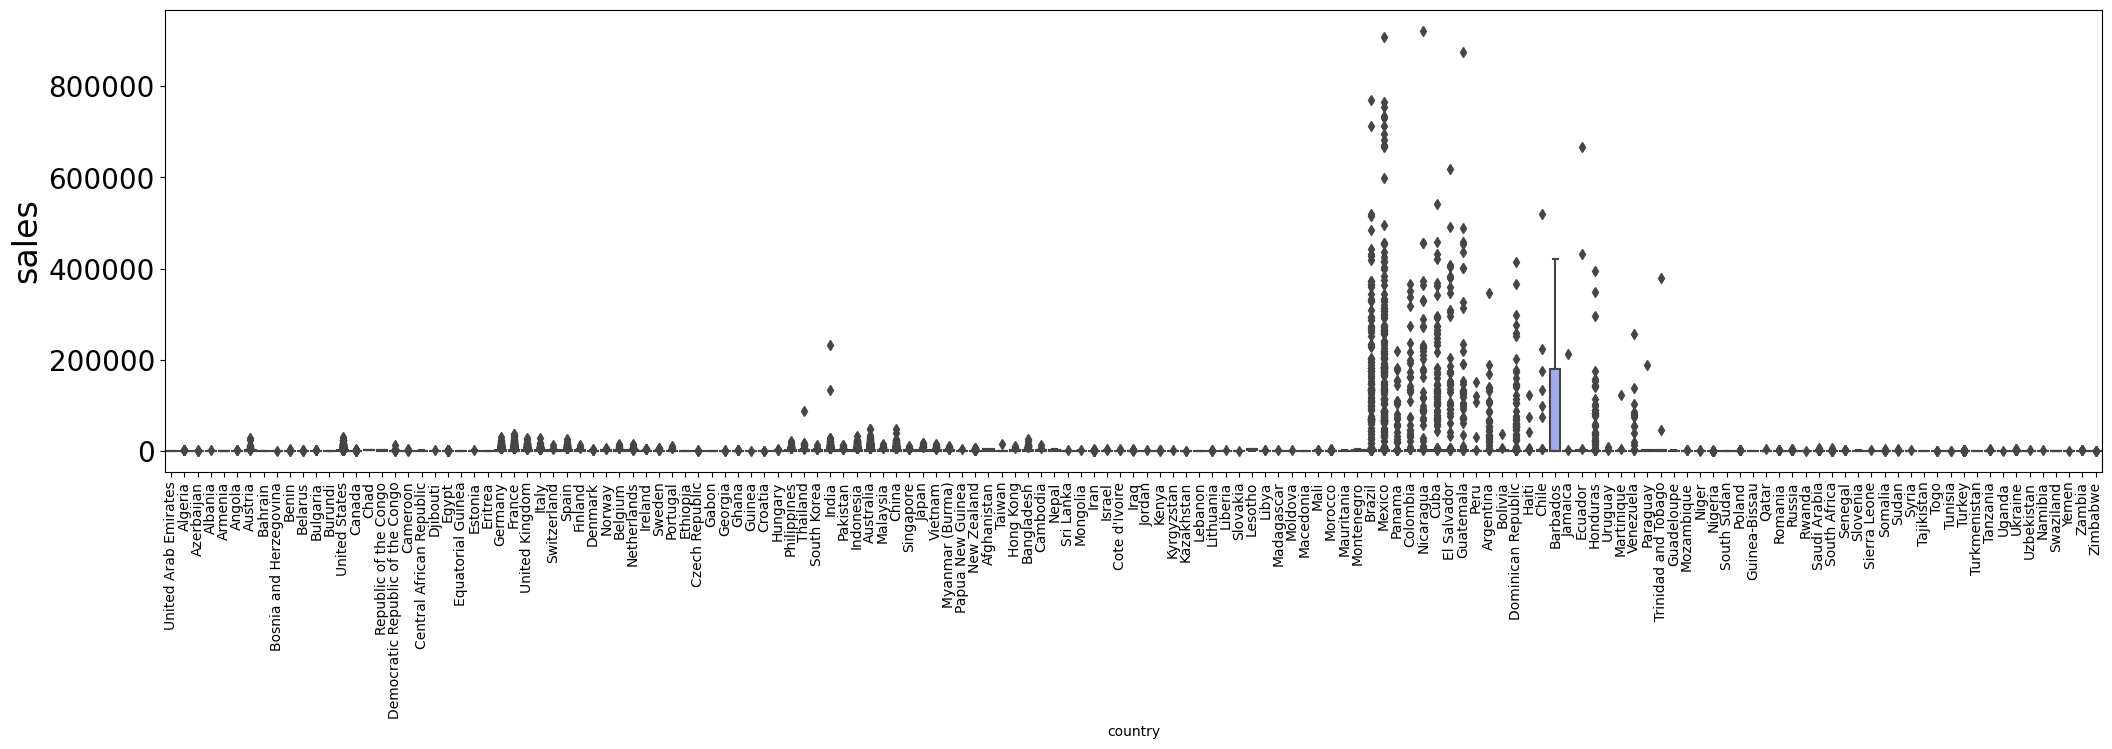

In [22]:
boxplot(data=df_orders_abt, x=geolocation_group, y='sales', showfliers=True);

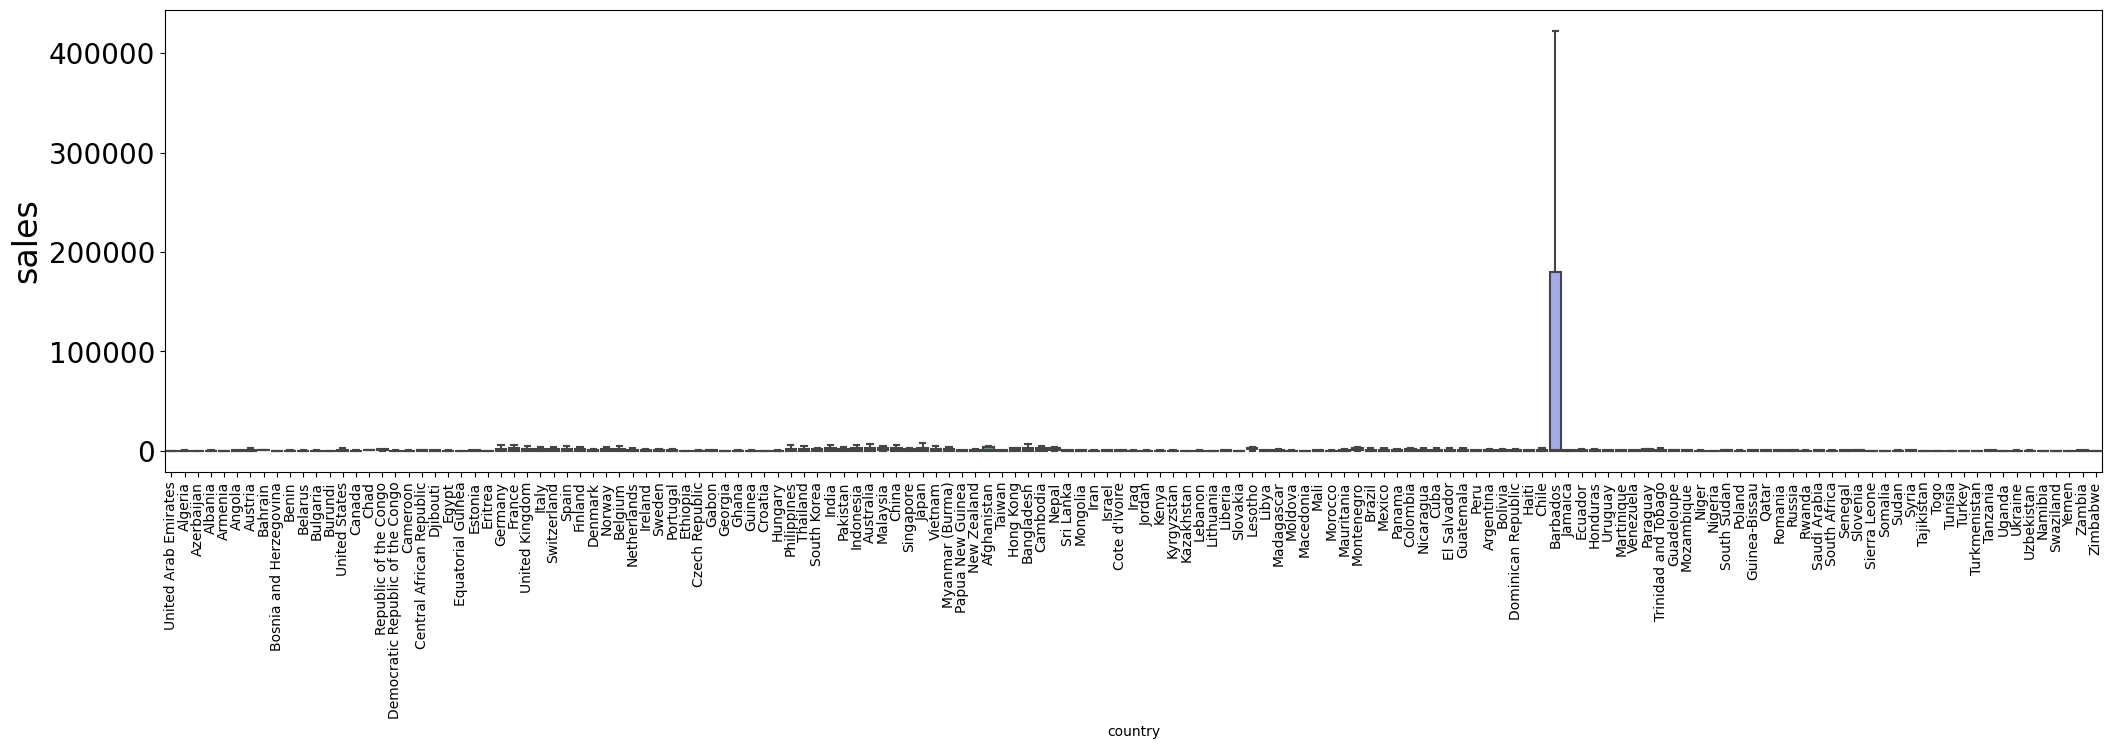

In [23]:
boxplot(data=df_orders_abt#.query("sales<5000000")
        , x=geolocation_group, y='sales', showfliers=False);

### Profit

        

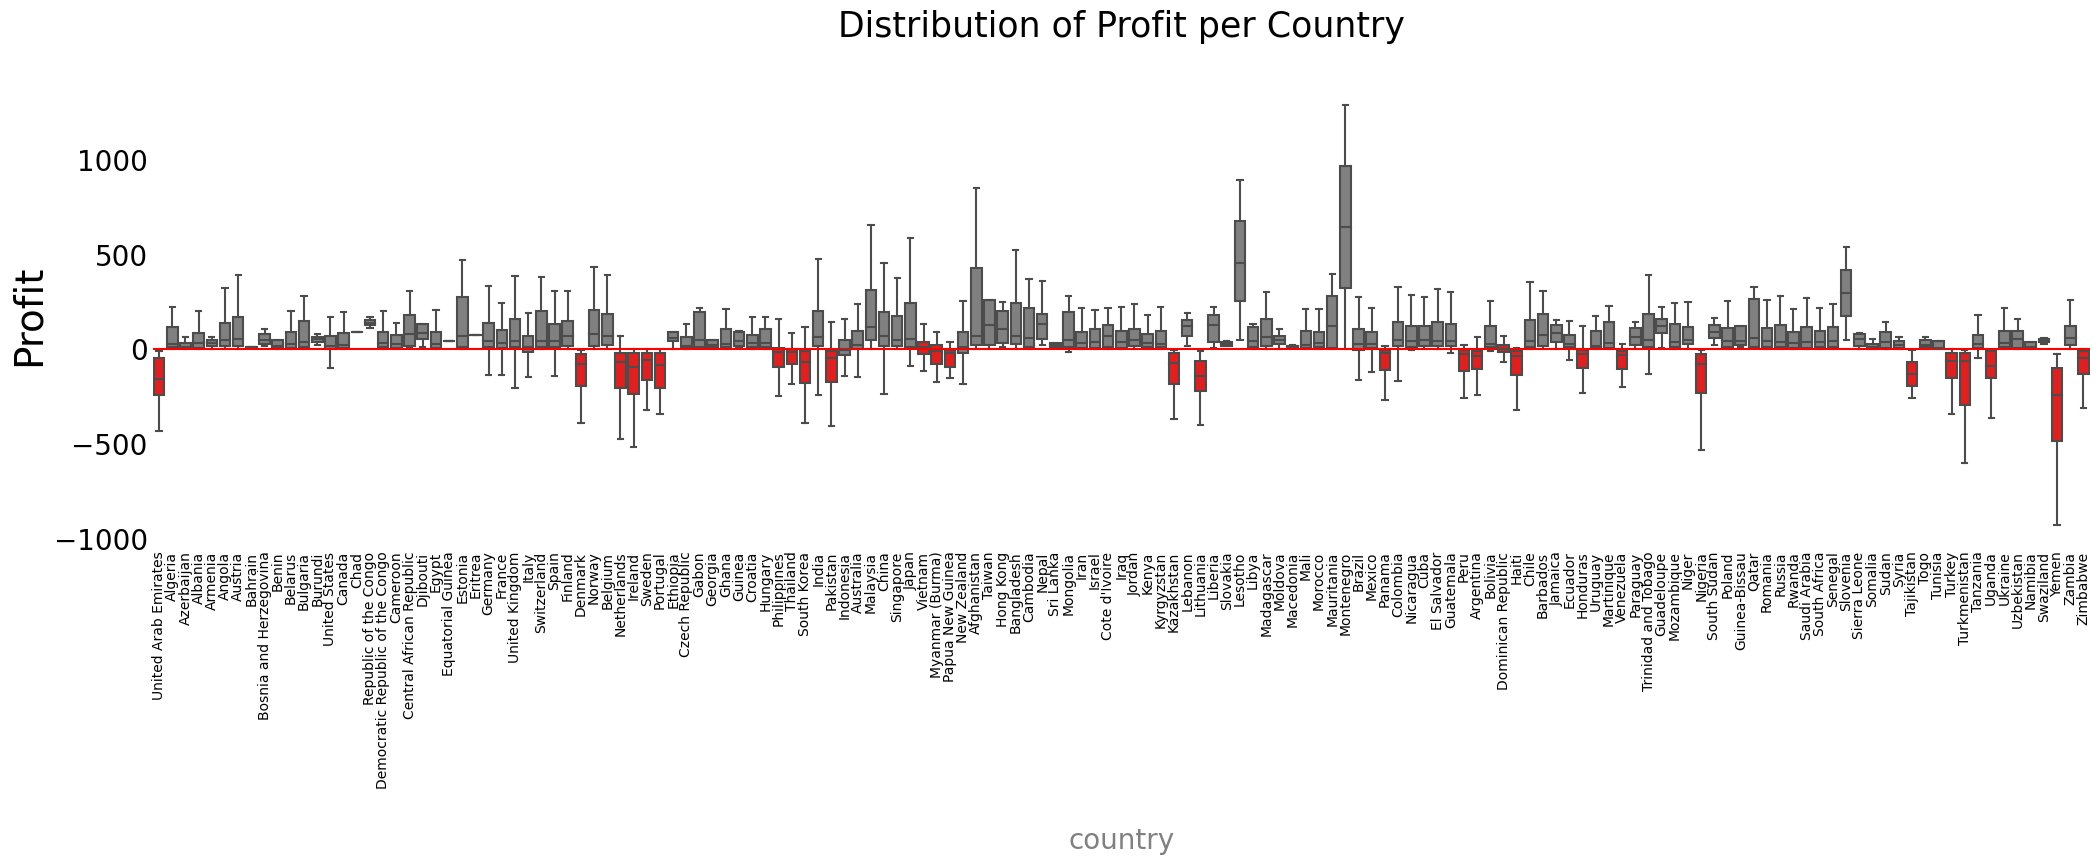

In [24]:
custom_palette = {}
for geolocation_group_ in set(df_orders_abt[geolocation_group]):
    profit = (np.sum(df_orders_abt[df_orders_abt[geolocation_group] == geolocation_group_]['profit']))
    if profit < 0:
        custom_palette[geolocation_group_] = 'red'
    else:
        custom_palette[geolocation_group_] = 'grey'
        
plt.box(False)
sns.boxplot(data=df_orders_abt, x=geolocation_group, y='profit', palette=custom_palette,
            showfliers=False)
plt.axhline(0, color='r')
plt.title("Distribution of Profit per Country\n", size=25)
plt.xlabel(f"\n{geolocation_group}", size=20, color='grey')
plt.ylabel("Profit", size=28)
# plt.ylim(-500, 650)
plt.tick_params(axis='both', which='both', length=0)
plt.yticks(color='black', size=20)
plt.xticks(rotation=90);

### delivery_time

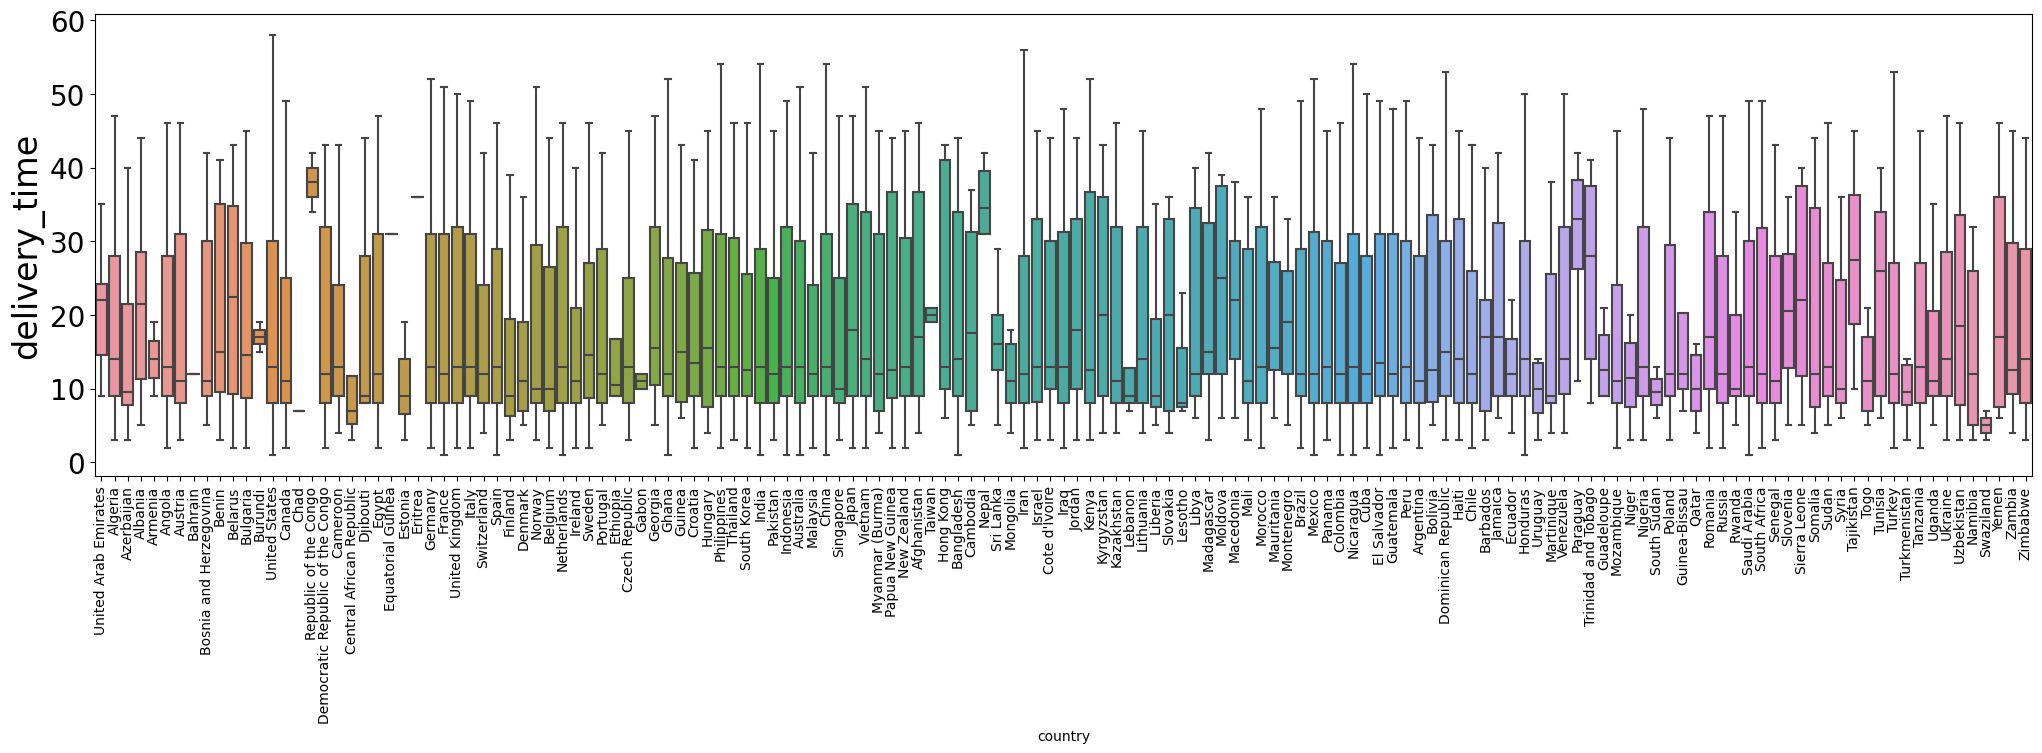

In [25]:
boxplot(data=df_orders_abt, x=geolocation_group, y='delivery_time', showfliers=False);

### days_to_ship

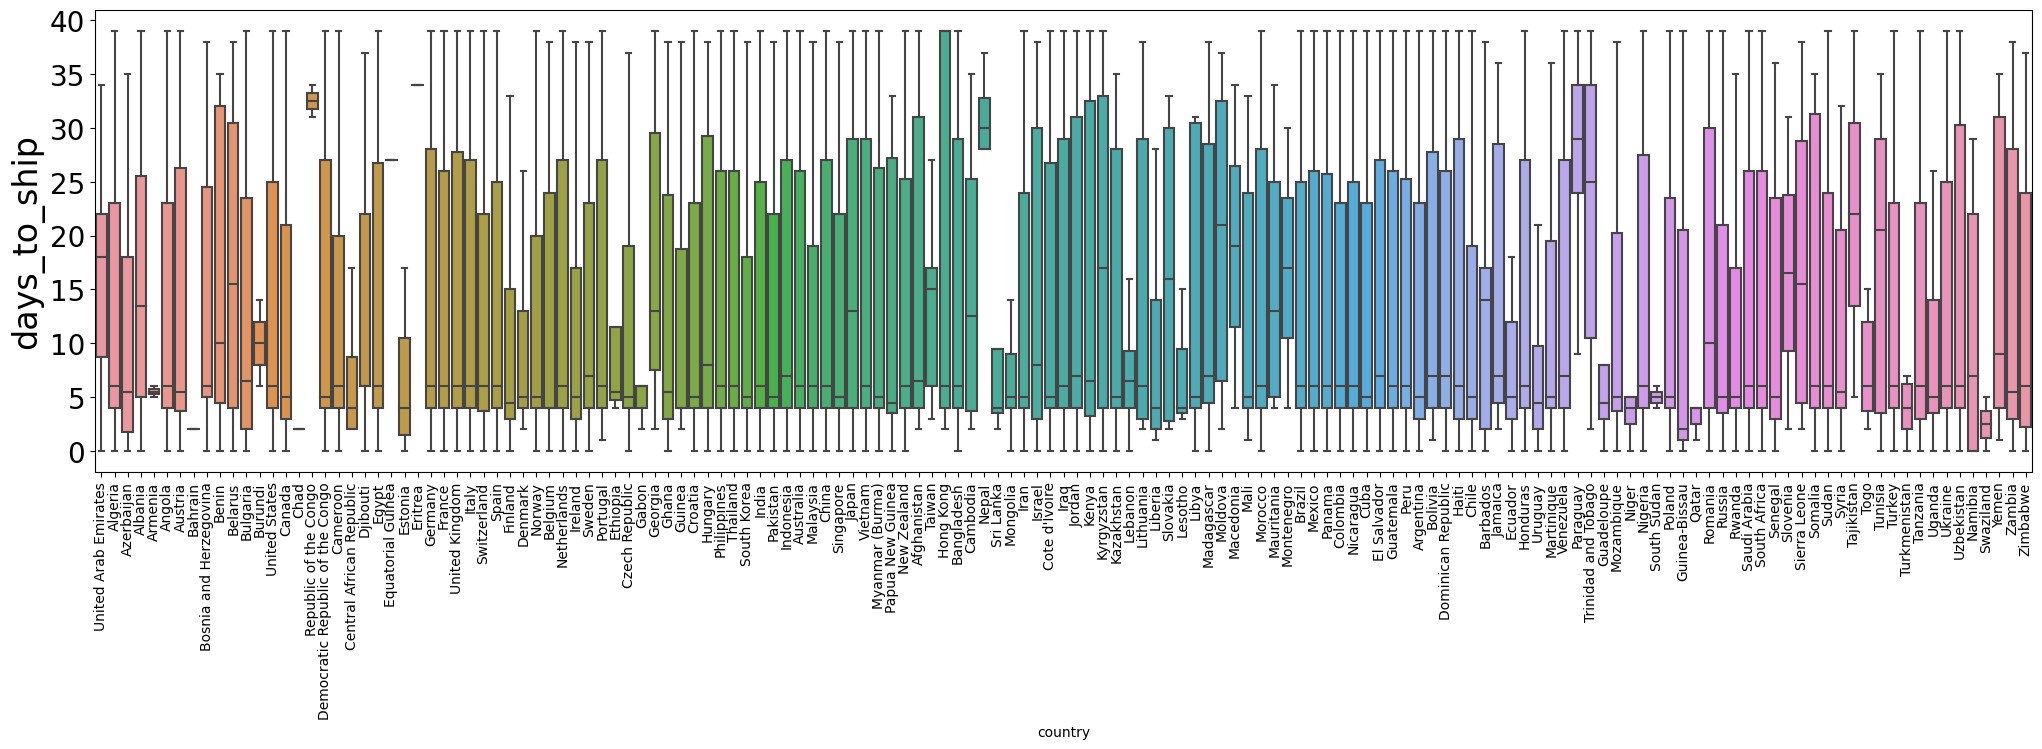

In [26]:
boxplot(data=df_orders_abt, x=geolocation_group, y='days_to_ship', showfliers=False);

### delayed_days

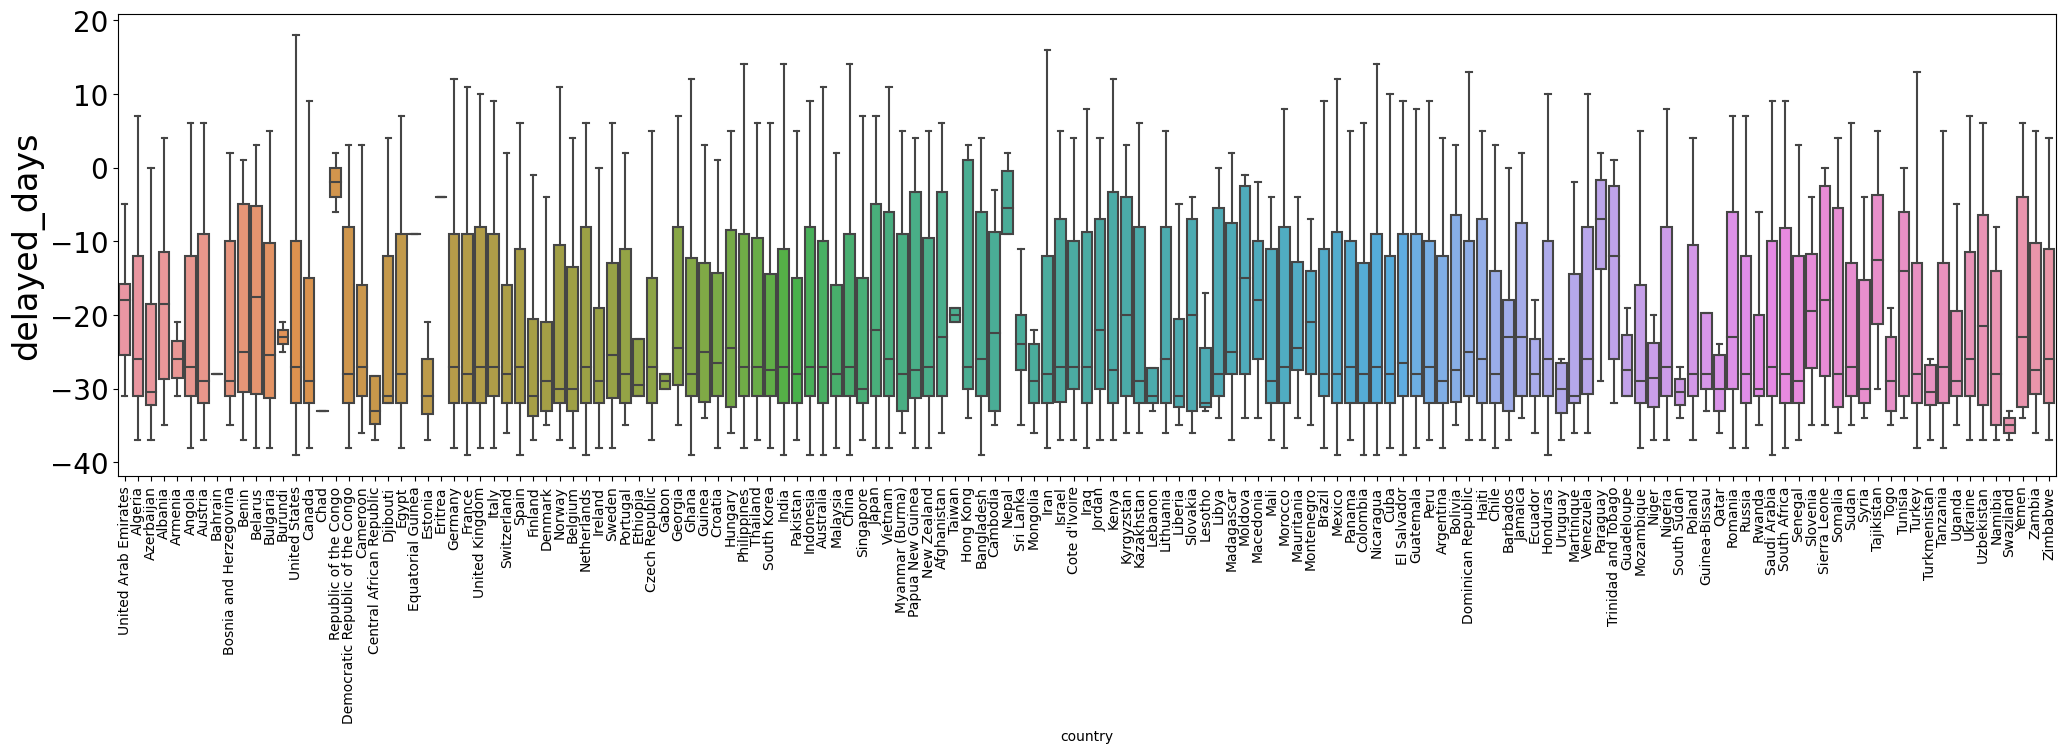

In [27]:
boxplot(data=df_orders_abt, x=geolocation_group, y='delayed_days', showfliers=False);

### n_products

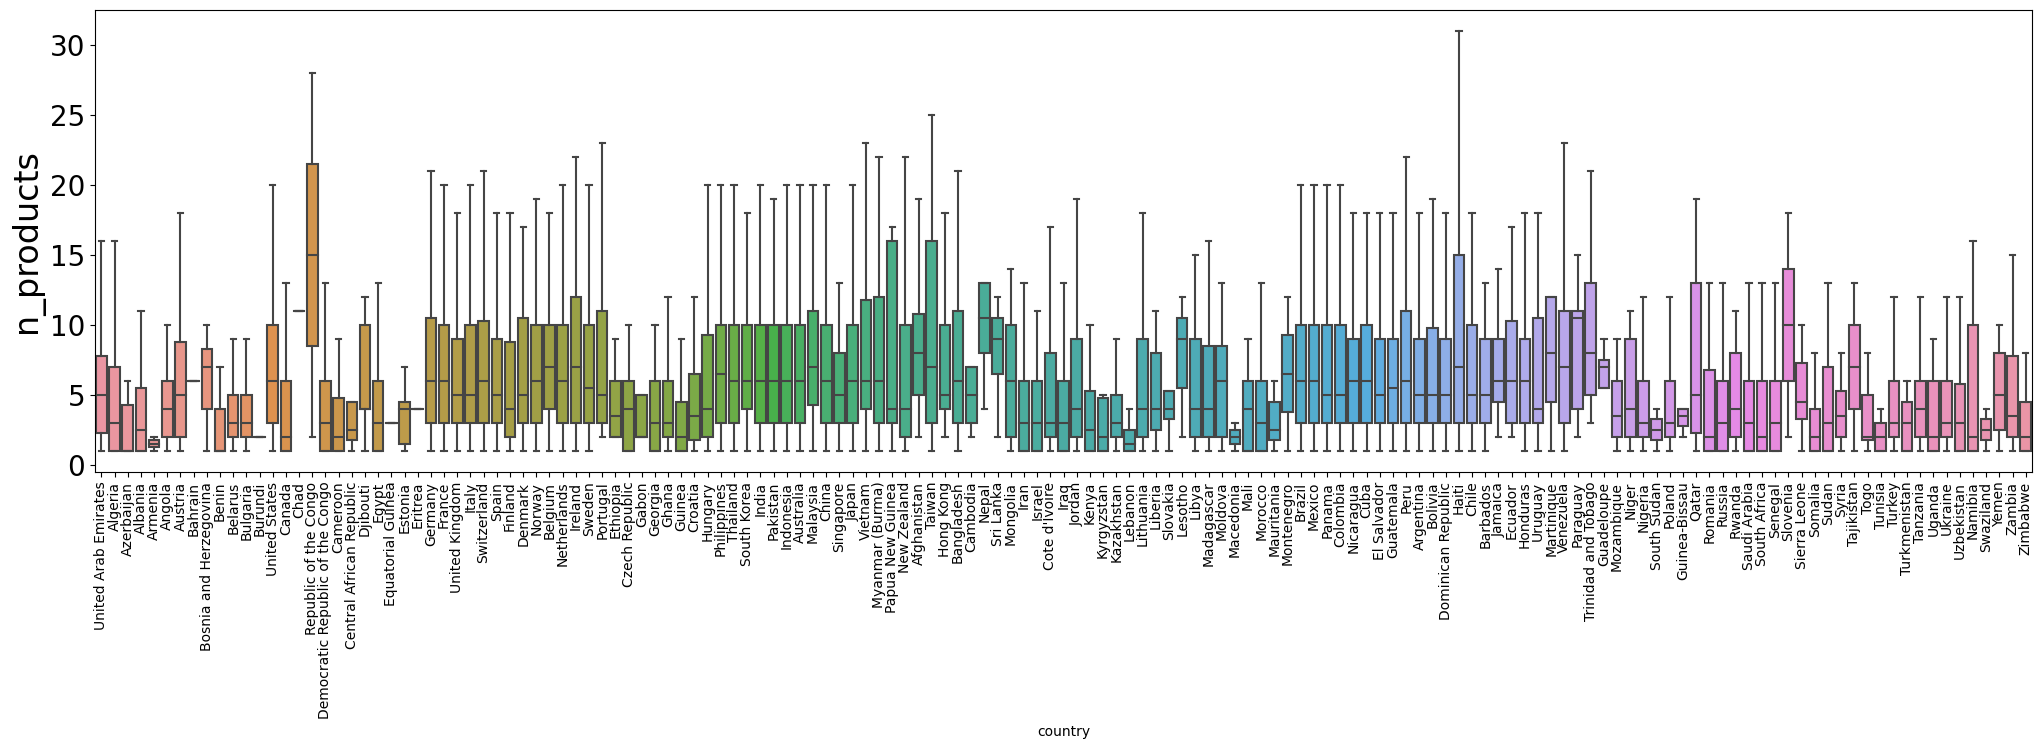

In [28]:
boxplot(data=df_orders_abt, x=geolocation_group, y='n_products', showfliers=False);

### avg_discount

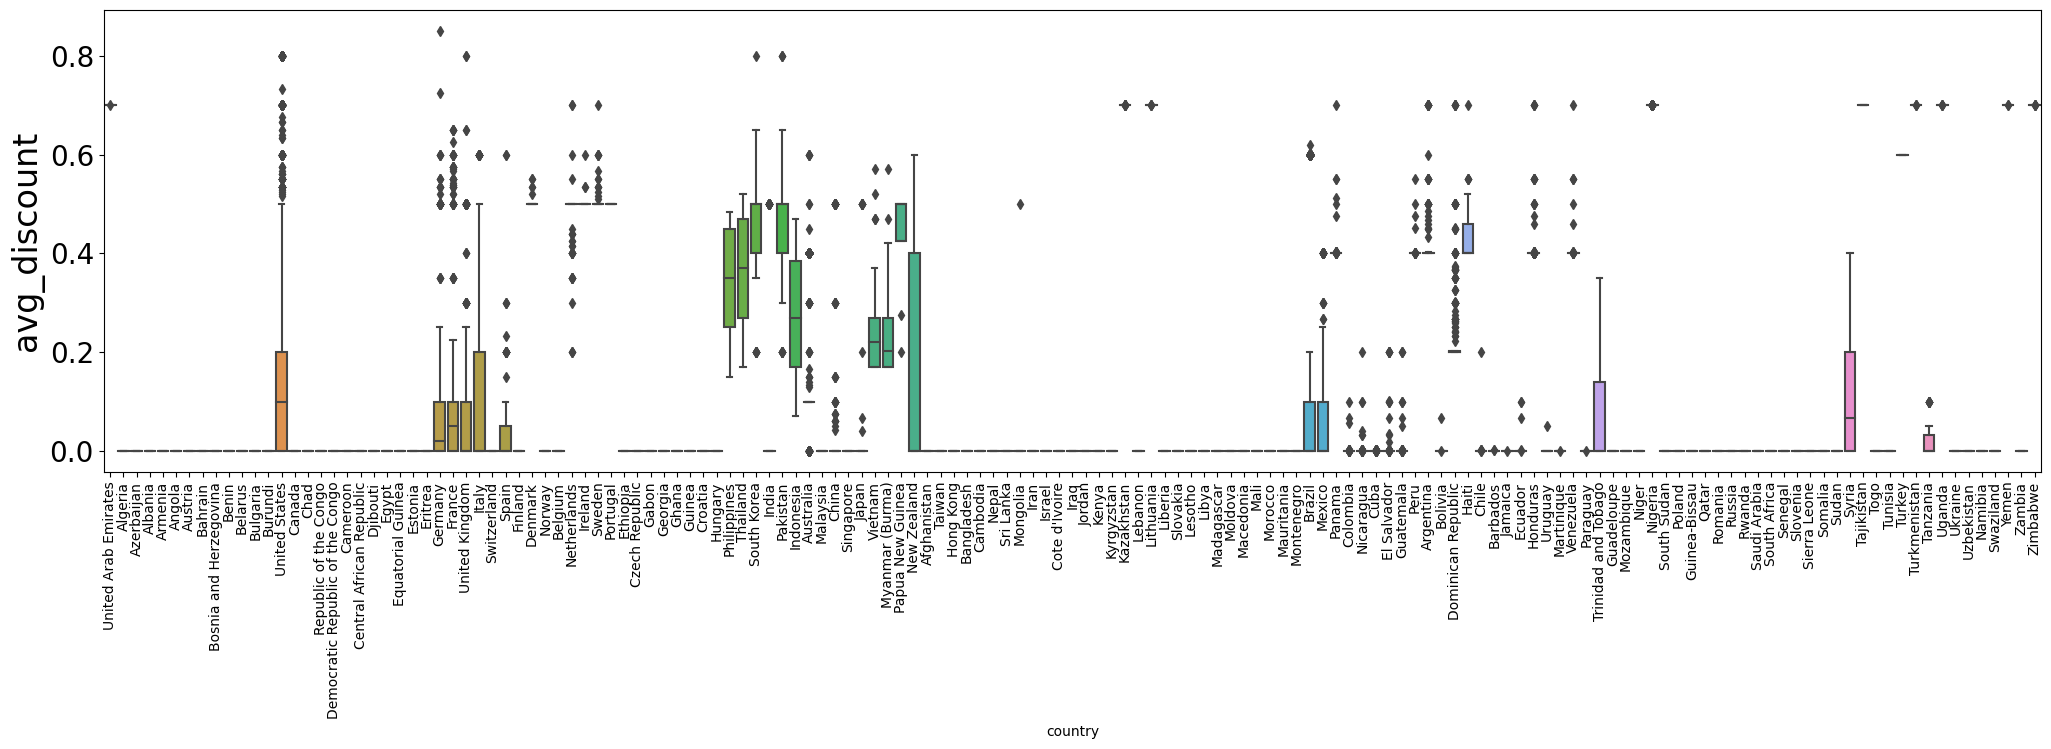

In [29]:
# total_discount
boxplot(data=df_orders_abt, x=geolocation_group, y='avg_discount', showfliers=True);

### avg_product_price

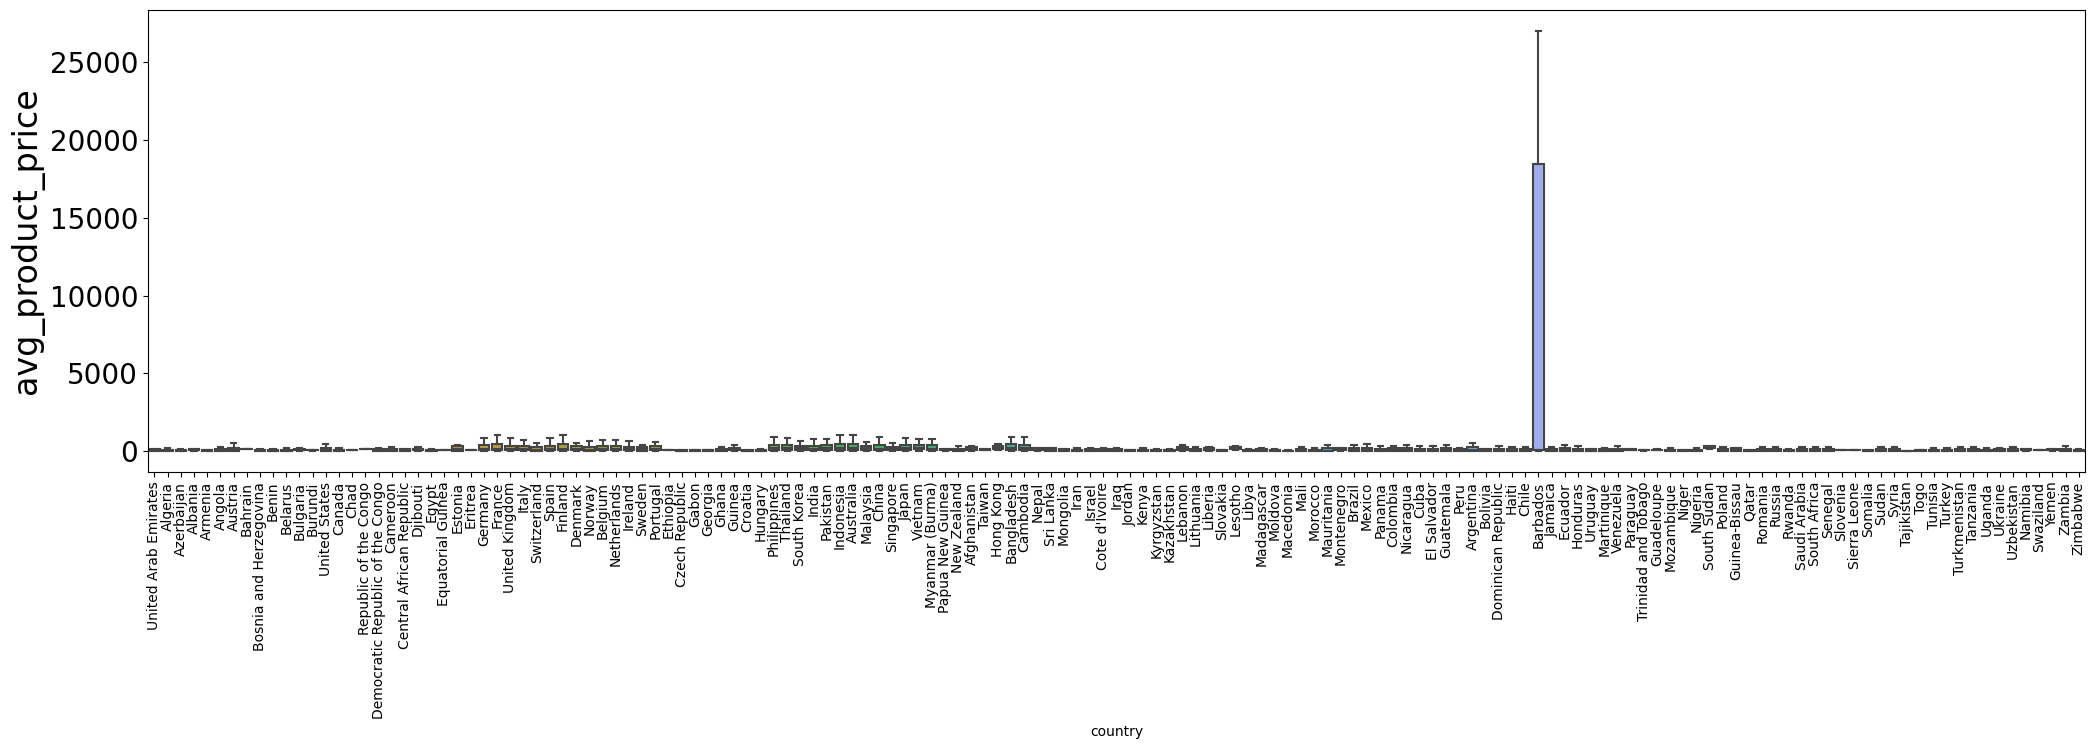

In [30]:
# max_product_price min_product_price
boxplot(data=df_orders_abt#.query("max_product_price<30000")
        , x=geolocation_group, y='avg_product_price', showfliers=False);

### shipping_cost

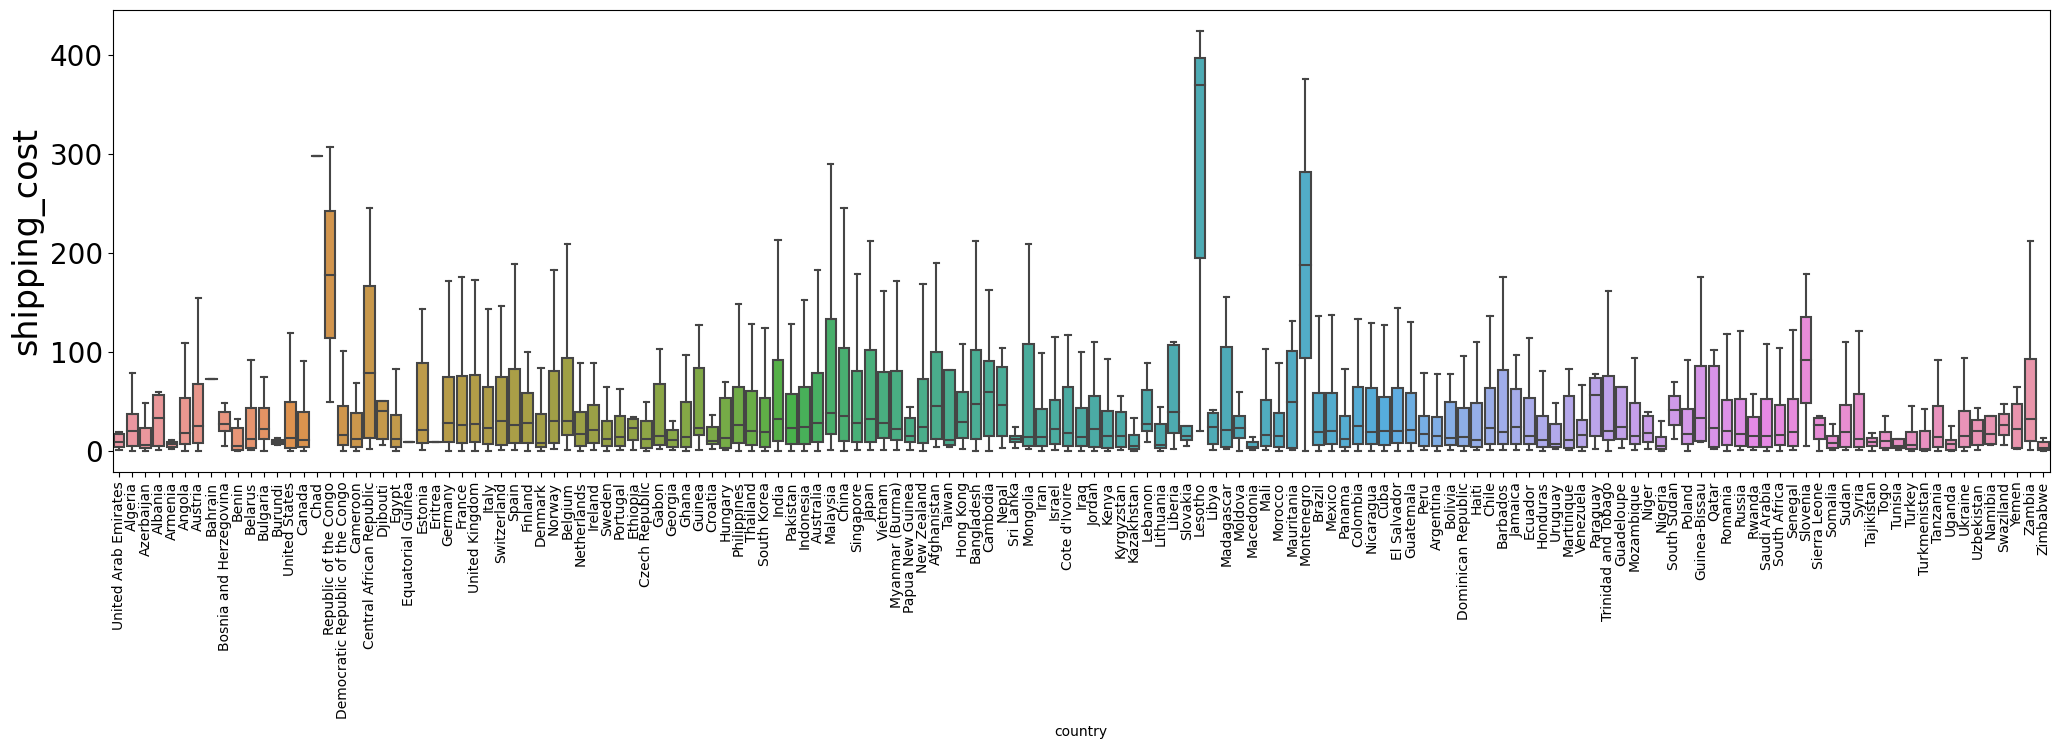

In [31]:
boxplot(data=df_orders_abt, x=geolocation_group, y='shipping_cost', showfliers=False);

## Analysis Results

In [32]:
fig(set_as_global=True)

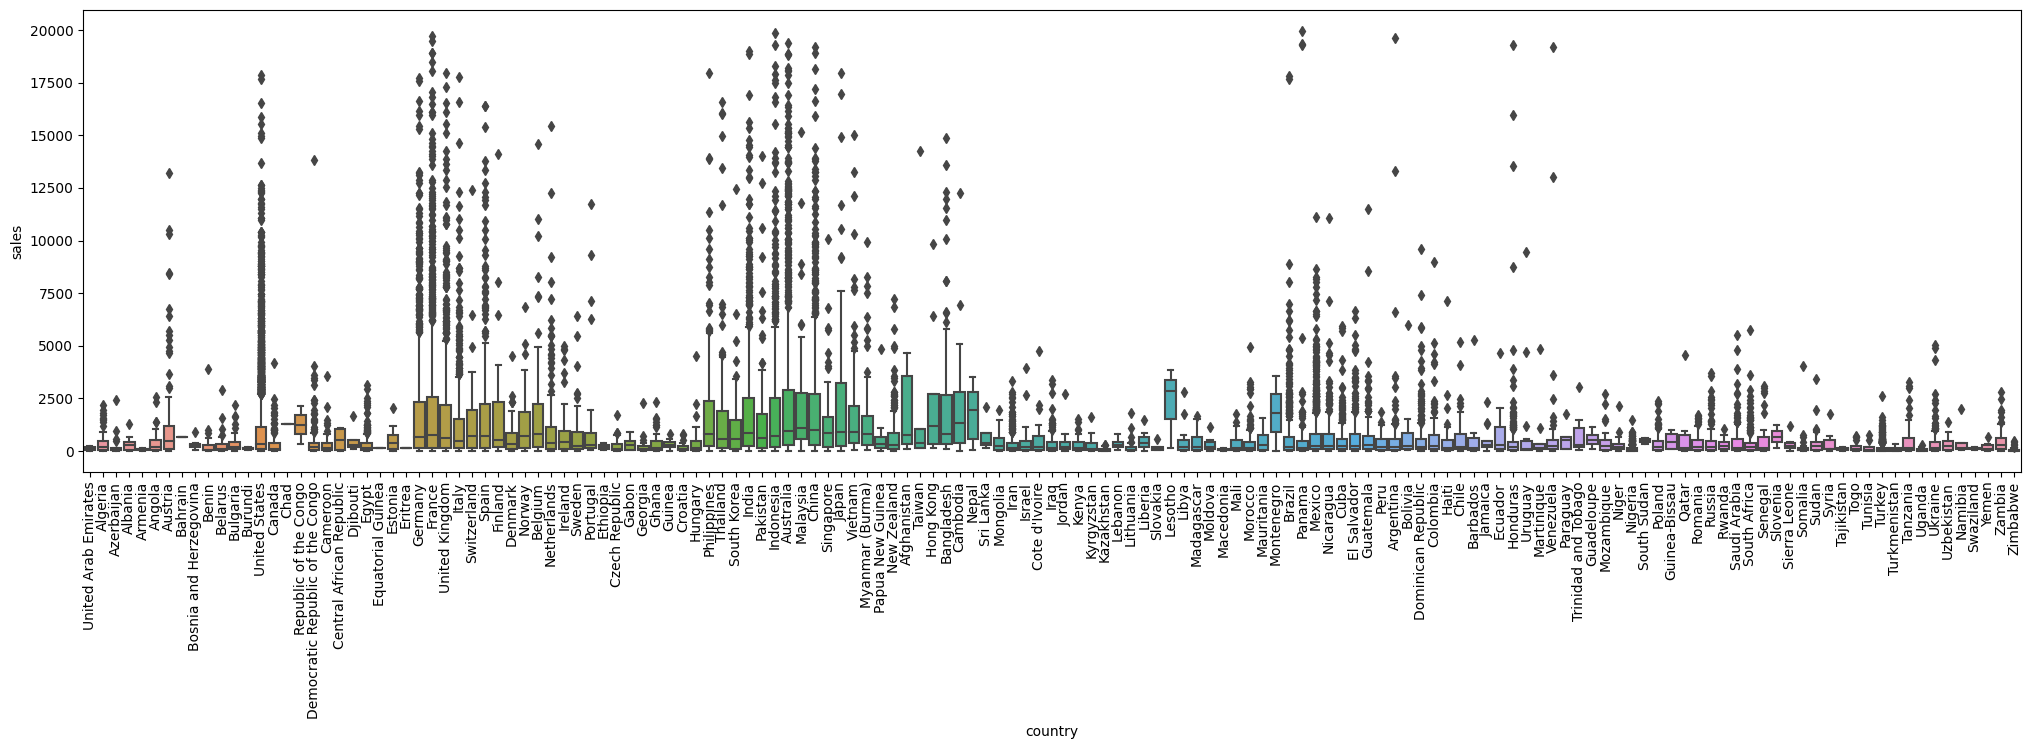

In [33]:
fig(25, 6)
sns.boxplot(data=df_orders_abt.query("sales<20000"), x='country', y='sales', showfliers=True)
plt.xticks(rotation=90);

For Sales, there are countries who have lower and higher sales values, but We can't really just differentiate one from another. Many of them overlap.

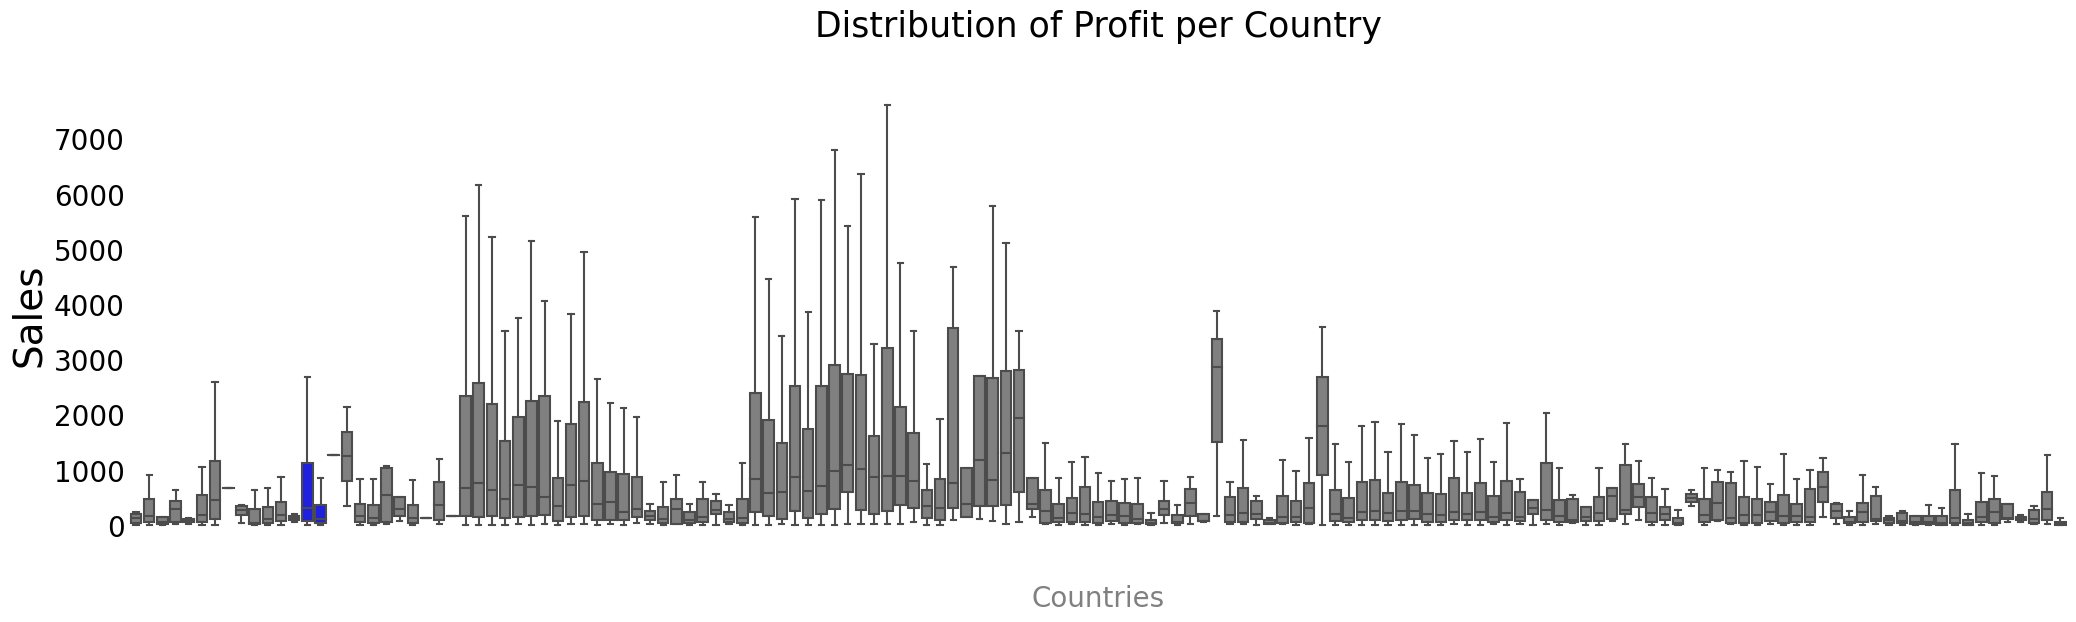

In [34]:
fig(25, 6)
custom_palette = {}
for country_ in set(df_orders_abt['country']):
    blue_list = ['United States', 'Canada']
    if country_ in blue_list:
        custom_palette[country_] = 'blue'
    else:
        custom_palette[country_] = 'grey'
        
plt.box(False)
sns.boxplot(data=df_orders_abt.query("sales<20000"), x='country', y='sales', palette=custom_palette, showfliers=False)
plt.title("Distribution of Profit per Country\n", size=25)
plt.xlabel("\nCountries", size=20, color='grey')
plt.ylabel("Sales", size=28)
plt.tick_params(axis='both', which='both', length=0)
plt.yticks(color='black', size=20)
plt.xticks([]);

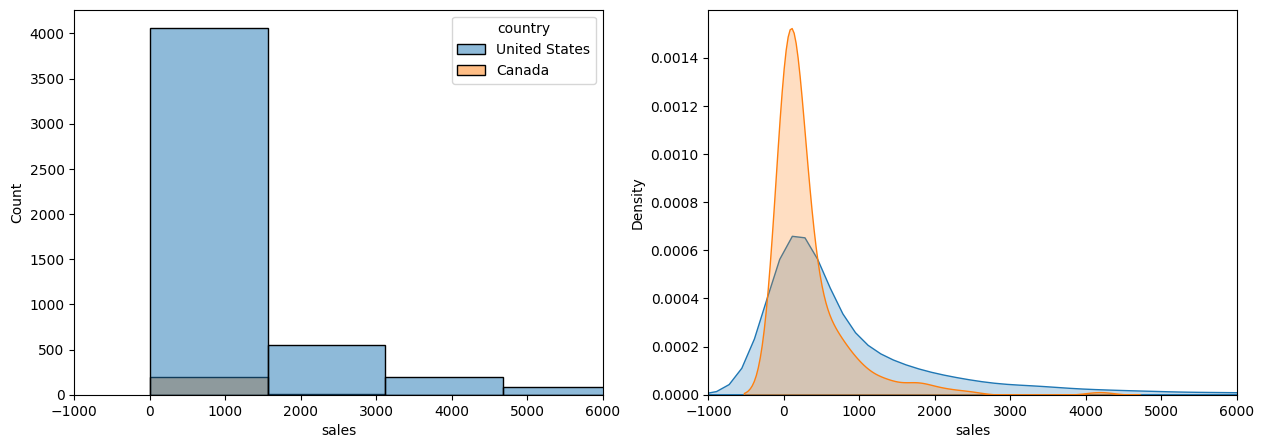

In [35]:
c = ['United States', 'Canada']
plt.subplot(1,2,1)
sns.histplot(data=df_orders_abt[df_orders_abt['country'].isin([c[0], c[1]])], x='sales', hue='country', bins=20);
plt.xlim(-1000, 6000)
plt.subplot(1,2,2)
sns.kdeplot(df_orders_abt[df_orders_abt['country'] == c[0]]['sales'], label=c[0], fill=True)
sns.kdeplot(df_orders_abt[df_orders_abt['country'] == c[1]]['sales'], label=c[1], fill=True)
plt.xlim(-1000, 6000);

Ideally, We would like to see more differences like this:

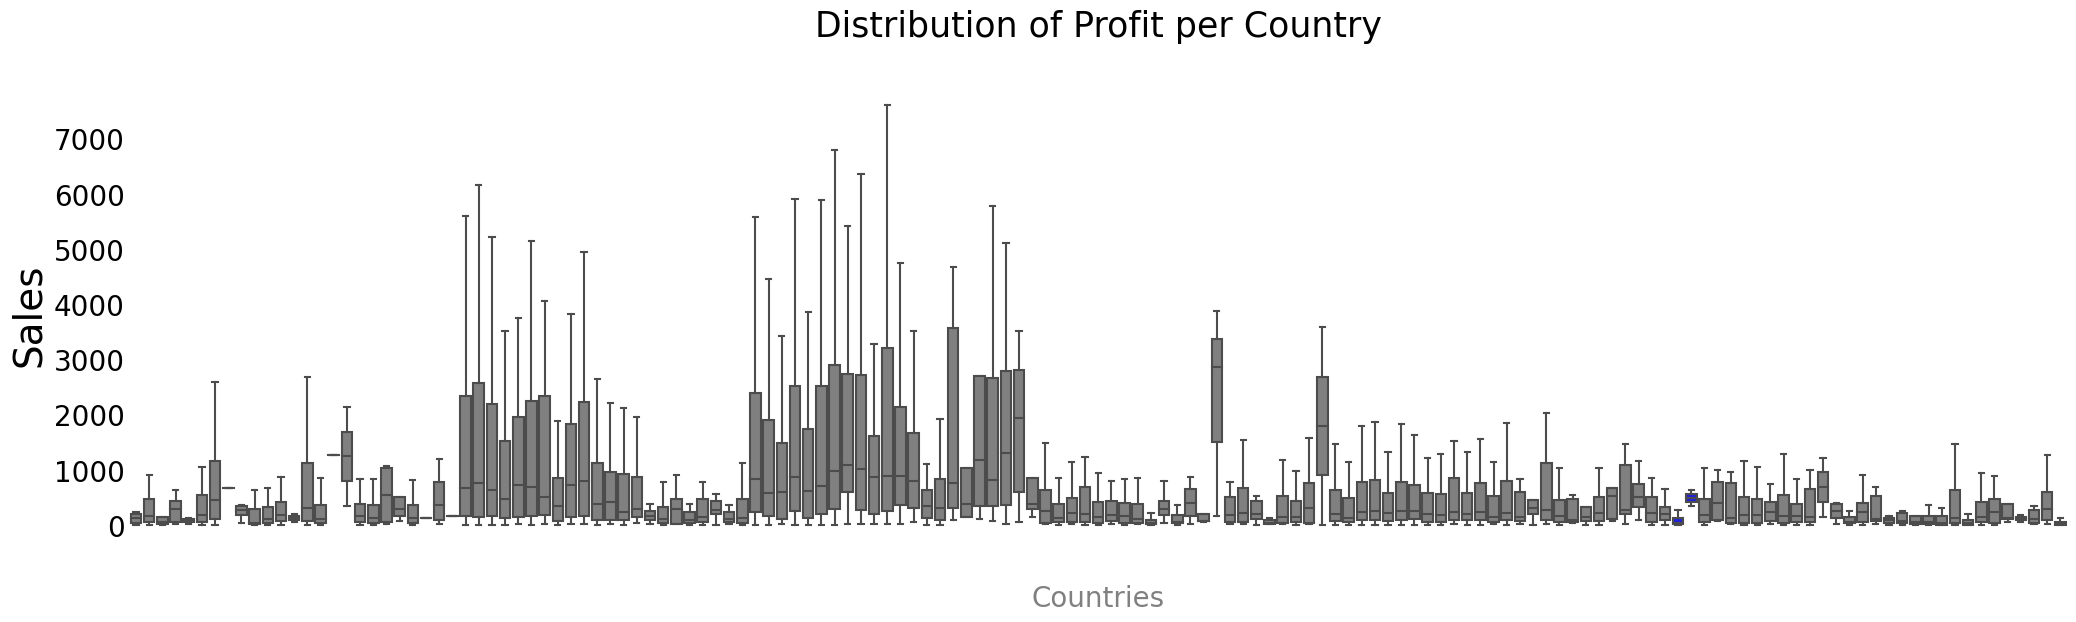

In [36]:
fig(25, 6)
custom_palette = {}
for country_ in set(df_orders_abt['country']):
    blue_list = ['Nigeria', 'South Sudan']
    if country_ in blue_list:
        custom_palette[country_] = 'blue'
    else:
        custom_palette[country_] = 'grey'
        
plt.box(False)
sns.boxplot(data=df_orders_abt.query("sales<20000"), x='country', y='sales', palette=custom_palette, showfliers=False)
plt.title("Distribution of Profit per Country\n", size=25)
plt.xlabel("\nCountries", size=20, color='grey')
plt.ylabel("Sales", size=28)
plt.tick_params(axis='both', which='both', length=0)
plt.yticks(color='black', size=20)
plt.xticks([]);

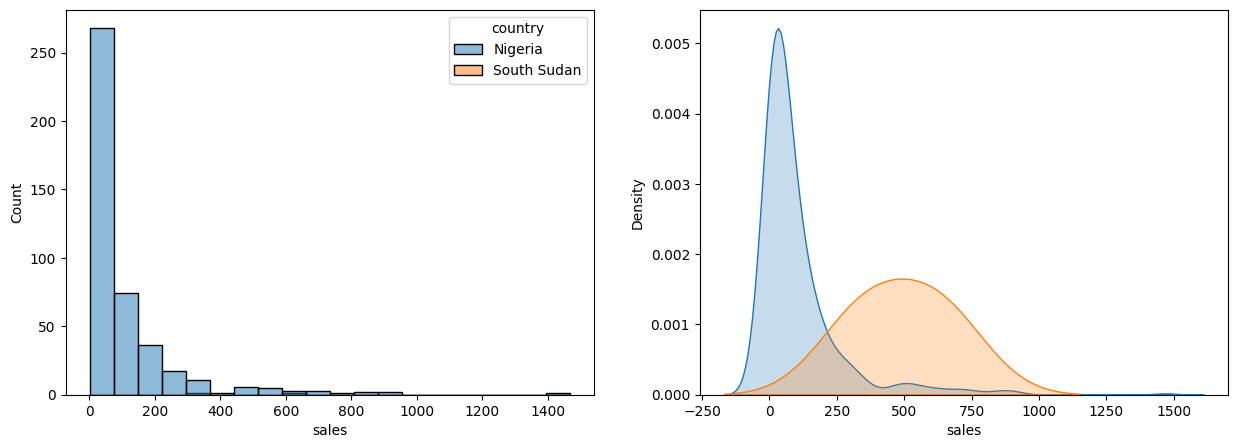

In [37]:
c = ['Nigeria', 'South Sudan']
plt.subplot(1,2,1)
sns.histplot(data=df_orders_abt[df_orders_abt['country'].isin([c[0], c[1]])],
             x='sales', hue='country', bins=20);
plt.subplot(1,2,2)
sns.kdeplot(df_orders_abt[df_orders_abt['country'] == c[0]]['sales'], label=c[0], fill=True)
sns.kdeplot(df_orders_abt[df_orders_abt['country'] == c[1]]['sales'], label=c[1], fill=True);

Using Sales as variable of analysis "We can't really differentiate one (country) from another."

With Profit however, We can see that there are countries that bring deficit to the company (transactions with negative profit).

Deficit group is responsable for 11.91% of annual revenue.

In [65]:
df_aux = (df_orders_abt.groupby(["country", df_orders_abt['order_date'].dt.year])
                      [['profit', 'sales']].sum())
df_aux['group'] = df_aux['profit'].apply(lambda x: 'Profit' if x>=0 else 'Deficit')

In [66]:
df_aux.groupby("group")[['sales']].sum()/df_aux[['sales']].sum()

,sales
group,
Deficit,0.119223
Profit,0.880777


In [67]:
(df_aux.groupby(["group", "order_date"])[['sales']].sum()
 /
 df_aux.groupby(["order_date"])[['sales']].sum())

sales
group   order_date          
Deficit 2019        0.108519
        2020        0.112845
        2021        0.137274
        2022        0.114539
Profit  2019        0.891481
        2020        0.887155
        2021        0.862726
        2022        0.885461

In [70]:
(df_aux.groupby(["group", "order_date"])[['sales']].sum()
 /
 df_aux.groupby(["order_date"])[['sales']].sum()).query("group == 'Deficit'").mean()

sales    0.118294
dtype: float64

In [63]:
df_aux = df_aux.groupby(["group", "order_date"])[['sales']].sum().merge(
    df_aux.groupby(["order_date"])[['sales']].sum(), how='left',
    on=['order_date']
)
df_aux

,sales_x,sales_y
order_date,,
2019,2.601024e+06,2.396843e+07
2020,3.387582e+06,3.001969e+07
2021,5.070279e+06,3.693556e+07
2022,5.348238e+06,4.669351e+07
2019,2.136741e+07,2.396843e+07
2020,2.663211e+07,3.001969e+07
2021,3.186528e+07,3.693556e+07
2022,4.134527e+07,4.669351e+07


In [64]:
df_aux['sales_x']/df_aux['sales_y']

order_date
2019    0.108519
2020    0.112845
2021    0.137274
2022    0.114539
2019    0.891481
2020    0.887155
2021    0.862726
2022    0.885461
dtype: float64

In [71]:
df_geolocation_abt['profitable'].value_counts()

True     118
False     29
Name: profitable, dtype: int64

In [72]:
df_geolocation_abt.groupby("profitable")[['total_sales']].sum()/df_geolocation_abt[['total_sales']].sum()

,total_sales
profitable,
False,0.119105
True,0.880895


The next step is to find out why this is happening and what can We the company do to avoid this situation. Does this deficit comes from certain products, category, or region? Let's investigate, just like a detective.

And the discount is the main reason behind negative profit.

In [43]:
df_orders_abt = df_orders_abt.merge(df_aux[['group']], how='left', on=['country'])

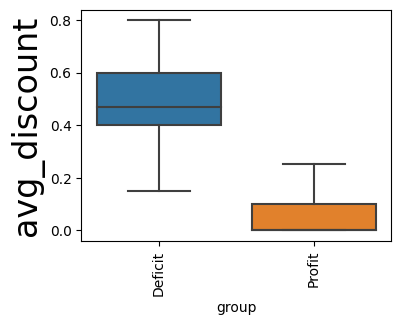

In [44]:
# sales, profit, delivery_time, days_to_ship, delayed_days,
# n_products, avg_discount, avg_product_price, shipping_cost,
fig(4,3)
boxplot(data=df_orders_abt, x='group', y='avg_discount', showfliers=False, yticks_size=10);

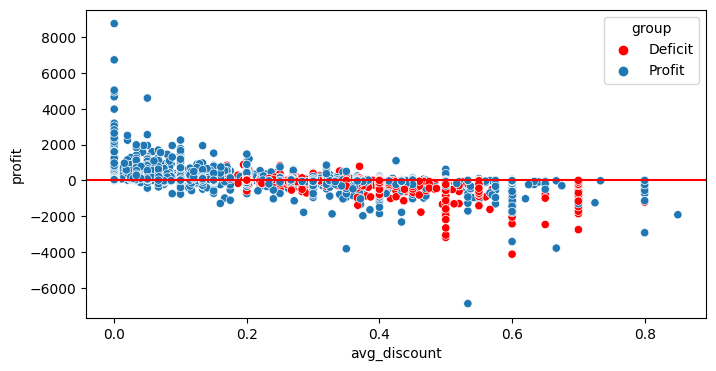

In [45]:
# sales, profit, delivery_time, days_to_ship, delayed_days,
# n_products, avg_discount, avg_product_price, shipping_cost,
fig(8, 4)
sns.scatterplot(data=df_orders_abt, x='avg_discount', y='profit', hue='group', palette=['red', '#1f77b4'])
plt.axhline(0, color='r');

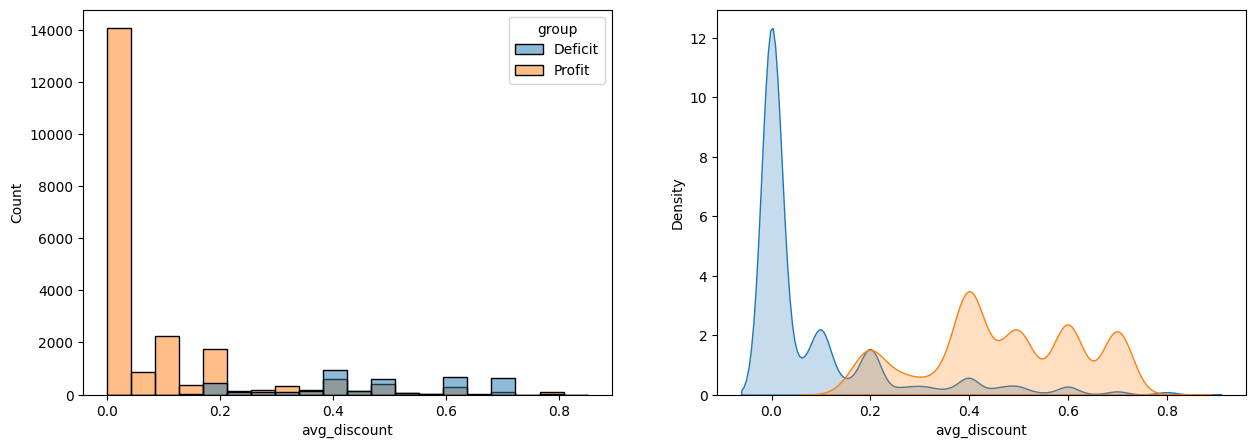

In [46]:
fig()
classes1 = ['Profit', 'Deficit']
plt.subplot(1,2,1)
sns.histplot(data=df_orders_abt, x='avg_discount', hue='group', bins=20);
plt.subplot(1,2,2)
sns.kdeplot(df_orders_abt[df_orders_abt['group'] == classes1[0]]['avg_discount'], label=classes1[0], fill=True)
sns.kdeplot(df_orders_abt[df_orders_abt['group'] == classes1[1]]['avg_discount'], label=classes1[1], fill=True);

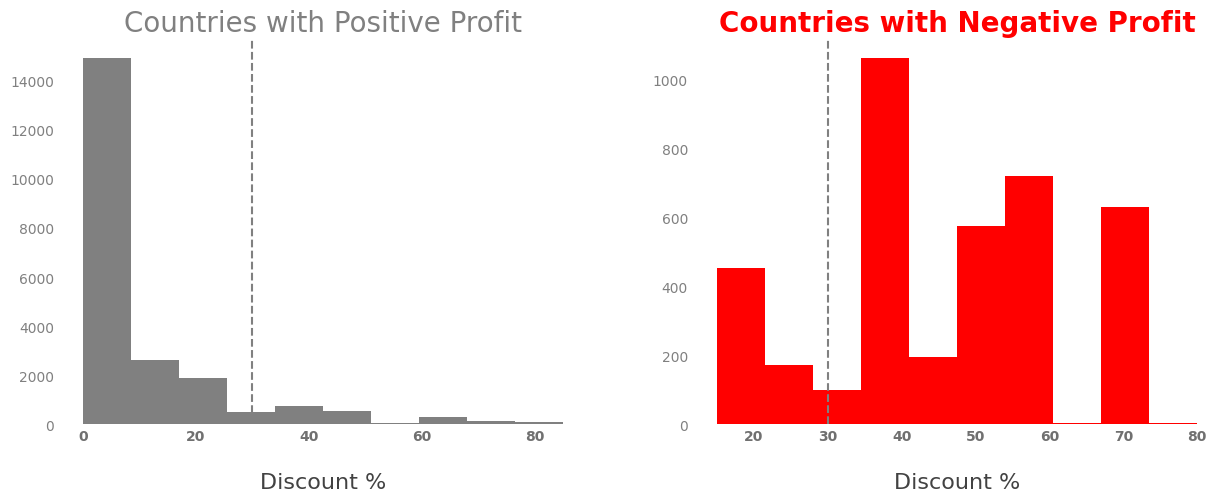

In [47]:
plt.subplot( 1, 2, 1 )
plt.box(False)
(df_orders_abt[df_orders_abt['group'] == 'Profit']['avg_discount']*100).hist(figsize=(15,5), color='grey')
plt.tick_params(axis='both', which='both', length=0)
plt.grid(None)
plt.title('Countries with Positive Profit', color='grey', size=20)
plt.xlabel("\nDiscount %", size=16, color='#424242')
plt.yticks(color='grey')
plt.xticks(color='#707070', weight='bold')
plt.axvline(30, color='grey', ls='--')

plt.subplot( 1, 2, 2 )
plt.box(False)
(df_orders_abt[df_orders_abt['group'] == 'Deficit']['avg_discount']*100).hist(color='red')
plt.tick_params(axis='both', which='both', length=0)
plt.grid(None)
plt.title('Countries with Negative Profit', color='red', weight='bold', size=20)
plt.xlabel("\nDiscount %", size=16, color='#424242')
plt.yticks(color='grey')
plt.xticks(color='#707070', weight='bold')
plt.axvline(30, color='grey', ls='--');